In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [63]:
la = 0.5
lb = 0.3

In [64]:
def System(N, t, la, lb):
    na, nb, nc = N
    
    dnadt = -la*na
    dnbdt = la*na - lb*nb
    dncdt = lb*nb
    return np.array([dnadt, dnbdt, dncdt])

In [65]:
t = np.linspace(0, 10, 50)
N0 = [500, 0, 0]
sol = odeint(System, N0, t, args=(la, lb))

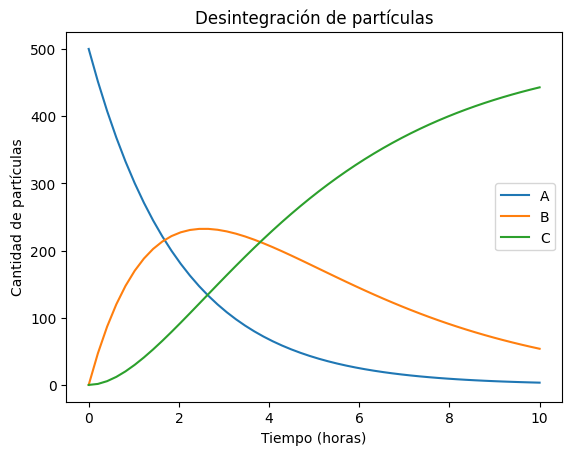

In [66]:
plt.plot(t, sol[:, 0], label='A')
plt.plot(t, sol[:, 1], label='B')
plt.plot(t, sol[:, 2], label='C')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Cantidad de partículas')
plt.title('Desintegración de partículas')
plt.legend()

In [67]:
def Increment(f, r, t, h, la, lb):
    k1 = np.array(f(r, t, la, lb))
    k2 = np.array(f(r + 0.5 * h * k1, t + 0.5 * h, la, lb))
    k3 = np.array(f(r + 0.5 * h * k2, t + 0.5 * h, la, lb))
    k4 = np.array(f(r + h * k3, t + h, la, lb))
    return r + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)

In [68]:
def Adaptativo(f, r0, t, la, lb, e=1e-4):
    h = t[1] - t[0]
    tf = t[-1]
    t = t[0]
    n = r0
    TimeVector = np.array([t])
    Vectors = np.array([r0])
    while t < tf:
        r1 = Increment(f, n, t, h, la, lb)
        r2 = Increment(f, r1, t + h, h, la, lb)
        rt = Increment(f, n, t, 2 * h, la, lb)
        error = np.linalg.norm(r2 - rt)
        if error < e:
            t += 2 * h
            n = rt
        else:
            q = 0.85 * (e / error) ** 0.25
            h = h * q
            t += h
        TimeVector = np.append(TimeVector, t)
        Vectors = np.vstack((Vectors, n))
    return TimeVector, Vectors

In [69]:
TimeVector, Vectors = Adaptativo(System, N0, t, la, lb)

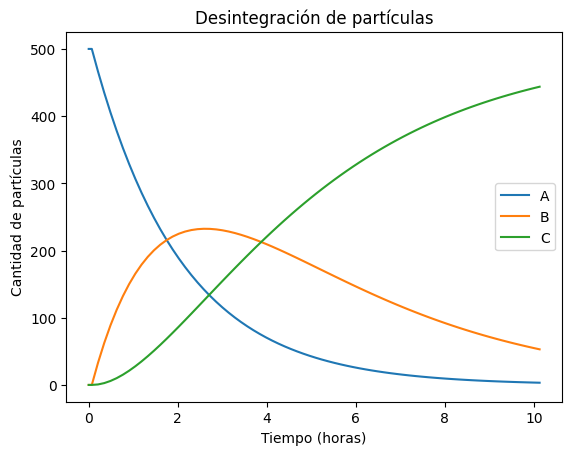

In [70]:
plt.plot(TimeVector, Vectors[:, 0], label='A')
plt.plot(TimeVector, Vectors[:, 1], label='B')
plt.plot(TimeVector, Vectors[:, 2], label='C')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Cantidad de partículas')
plt.title('Desintegración de partículas')
plt.legend()

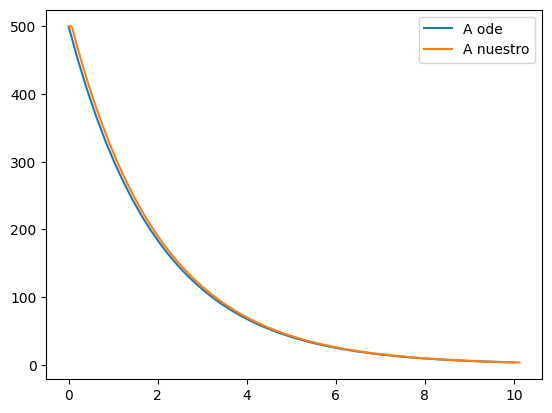

In [71]:
plt.plot(t, sol[:, 0], label='A ode')
plt.plot(TimeVector, Vectors[:, 0], label='A nuestro')
plt.legend()

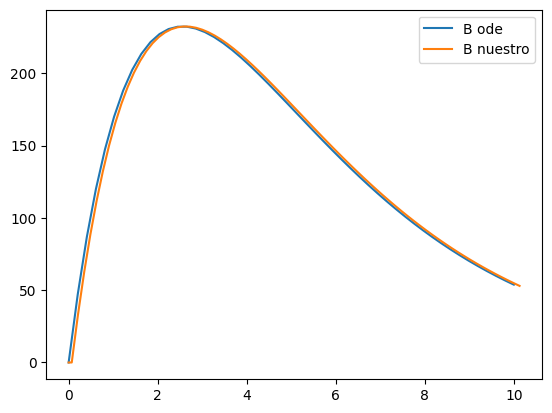

In [72]:
plt.plot(t, sol[:, 1], label='B ode')
plt.plot(TimeVector, Vectors[:, 1], label='B nuestro')
plt.legend()

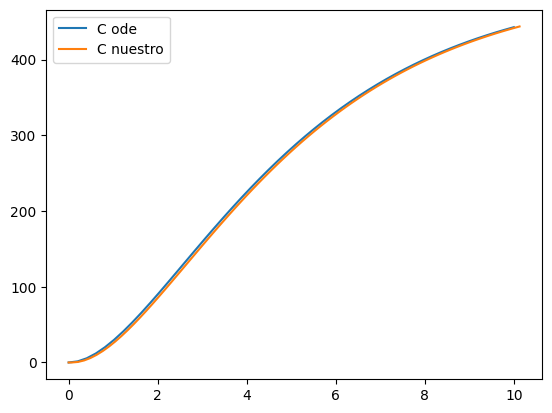

In [73]:
plt.plot(t, sol[:, 2], label='C ode')
plt.plot(TimeVector, Vectors[:, 2], label='C nuestro')
plt.legend()

In [74]:

indice_max_B = np.argmax(Vectors[:, 1])

max_B = Vectors[indice_max_B, 1]
max_C = Vectors[indice_max_B, 2]

# Imprimir los resultados
print("En el momento en que la cantidad de partículas B es máxima:")
print("Cantidad de partículas B con nuestro codigo:", max_B)
print("Cantidad de partículas C con nuestro codigo:", max_C)

En el momento en que la cantidad de partículas B es máxima:
Cantidad de partículas B con nuestro codigo: 232.35141936011607
Cantidad de partículas C con nuestro codigo: 125.43914594827015


In [75]:

indice_max_Bsol = np.argmax(sol[:, 1])
max_Bsol = sol[indice_max_Bsol, 1]
max_Csol = sol[indice_max_Bsol, 2]
print("En el momento en que la cantidad de partículas B es máxima:")
print("Cantidad de partículas B con Odeint:", max_Bsol)
print("Cantidad de partículas C con Odeint:", max_Csol)

En el momento en que la cantidad de partículas B es máxima:
Cantidad de partículas B con Odeint: 232.21284866838428
Cantidad de partículas C con Odeint: 135.08893688119392
